# Proyek Analisis Data: Nama dataset
- Nama: Ardra Chandra Satriyo
- Email: satriyoardra7@gmail.com
- Id Dicoding:satriyoardra

## Menentukan Pertanyaan Bisnis

- Bagaimanakah pengaruh kondisi musim terhadap jumlah pengguna rental sepeda ?
- Bagaimanakah pengaruh cuaca terhadap jumlah pengguna rental sepeda ?
-  Bagaimana kondisi rental sepeda dari tahun 2011 ke tahun 2012 , apakah mengalami penaikan atau malah penurunan ?
-  Bagaimanakah pengaruh hari liburan , hari dalam seminggu dan hari kerja terhadap jumlah pengguna ?
- Bagaimanakah pengaruh jam terhadap jumlah pengguna ?
-  Bagaimanakah tren dari seluruh data yang terekam terhadap jumlah pengguna rental sepeda ?







## Menyiapkan semua library yang dibutuhkan

Melakukan import library yang dibutuhkan untuk melakukan Proses Analisis Data

> Library `numpy `berfungsi sebagai komputasi numerik.

> Librray `pandas` berfungsi untuk membuat dataframe yang bertujuan menganalisis dan memanipulasi data.

> Library ` matplotlib` berfungsi untuk melakukan data visualization.

> Library `seaborn` berfungsi untuk melakukan data visualization yang lebih menarik.












In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


diatas merupakan dataframe dari data `day.csv` menggunakan library `pandas`

In [4]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


diatas merupakan dataframe dari data `hour.csv` menggunakan library `pandas`

### Assessing Data

Data day_df

Mengecek apakah ada tipe data yang tidak tepat atau adanya inconsistetn value atau inaccurate value pada data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


diatas diketahui bahwa `adanya tipe data yang salah` pada kolom data `dteday` , seharusnya menggunakan tipe data `datetime`

Melakukan pengecekan Missing Value

In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Diatas terlihat bahwa tidak adanya data yang missing pada tabel day_df.

Melakukan Pengecekan Data Duplikat

In [7]:
print("Jumlah duplikat data : " , day_df.duplicated().sum())

Jumlah duplikat data :  0


Diatas terlihat bahwa tidak ada data yang sifatnya duplikat

Melihat parameter statistik pada data

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dari tabel parameter statistik ditas tidak telrihat adanya values yang tidak masuk akal atau incorrect dan tidak adanya juga value yang tidak konsisten.

Pada hour_df

Mengecek apakah ada tipe data yang tidak tepat atau adanya inconsistetn value atau inaccurate value pada data

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


diatas diketahui bahwa adanya tipe data yang salah pada kolom data `dteday` , seharusnya menggunakan tipe data `datetime`

Mengecek apakah ada Missing Value

In [10]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terlihat diatas data tidak memiliki missing value

Mengecek apakah ada data duplikat

In [11]:
print("Jumlah duplikat data : ",hour_df.duplicated().sum())

Jumlah duplikat data :  0


Terlihat bahwa tidak ada duplikat data

Menggunakan parameter statistik untuk mengecek apakah ada nilai inccorrect values atau inconsistent values

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


dari tabel parameter statistik ditas tidak telrihat adanya values yang tidak masuk akal atau incorrect dan tidak adanya juga value yang tidak konsisten.

### Cleaning Data

Dikarenakan pada kedua data diatas yaitu day_csv dan hour_csv hanya memiliki satu permaslahan yaitu tipe data yang kurang tepat pada dteday yang seharusnya merupakan tipe data date time bukan tipe data object .

Maka Cleaning Data kali ini hanya akan merubah tipe data dtedaynya saja.

Pada day_df

In [13]:
tipedata = ["dteday"]
for gantitipedata in tipedata:
  day_df[gantitipedata]=pd.to_datetime(day_df[gantitipedata])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Terlihat diatas bahwa tipe data pada dteday yang tidak sesuai tadi telah diganti kepada tipe data ynag sesuai yaitu datetime.

pada hour_df

In [14]:
tipedata1 = ["dteday"]
for gantitipedata in tipedata1:
  hour_df[gantitipedata] = pd.to_datetime(hour_df[gantitipedata])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Terlihat diatas bahwa tipe data pada dteday yang tidak sesuai tadi telah diganti kepada tipe data ynag sesuai yaitu datetime.

## Exploratory Data Analysis (EDA)

Pengaruh Cuaca terhadap Jumlah Pengguna Sepeda

In [15]:
day_df.groupby(by="weathersit").cnt.mean().sort_values(ascending=True).reset_index()

,weathersit,cnt
0,3,1803.285714
1,2,4035.862348
2,1,4876.786177


In [16]:
hour_df.groupby(by="weathersit").cnt.mean().sort_values(ascending=True).reset_index()

,weathersit,cnt
0,4,74.333333
1,3,111.579281
2,2,175.165493
3,1,204.869272


Pengaruh musim terhadap jumlah pengguna

In [17]:
day_df.groupby(by="season").cnt.mean().sort_values(ascending=True).reset_index()

,season,cnt
0,1,2604.132597
1,4,4728.162921
2,2,4992.331522
3,3,5644.303191


In [18]:
hour_df.groupby(by="season").cnt.mean().sort_values(ascending=True).reset_index()

,season,cnt
0,1,111.114569
1,4,198.868856
2,2,208.344069
3,3,236.016237


kondisi rental sepeda dari tahun 2011 ke tahun 2012

In [19]:
day_df.groupby(by="yr").cnt.mean().sort_values(ascending=True).reset_index()

,yr,cnt
0,0,3405.761644
1,1,5599.934426


Nilai selisih jumlah pengguna dari tahun 2011 pada 2012

In [20]:
# Membuat DataFrame baru yang berisi perbedaan nilai cnt antara year 0 dan year 1
result_df = day_df.groupby(by="yr")['cnt'].mean().reset_index()
result_df['nilai selisih cnt'] = result_df['cnt'].diff()
result_df['persentase selisih cnt'] = (result_df['nilai selisih cnt'] / result_df['cnt'].shift(1)) * 100
# Menampilkan hasil
print(result_df)

   yr          cnt  nilai selisih cnt  persentase selisih cnt
0   0  3405.761644                NaN                     NaN
1   1  5599.934426        2194.172782               64.425318


Pengaruh waktu liburan terhadap jumlah pengguna

In [21]:
day_df.groupby(by="holiday").cnt.mean().sort_values(ascending=True).reset_index()

,holiday,cnt
0,1,3735.000000
1,0,4527.104225


Pengaruh waktu weekday dan working day pada jumlah pengguna

In [22]:
day_df.groupby(by="weekday").cnt.mean().sort_values(ascending=True).reset_index()

,weekday,cnt
0,0,4228.828571
1,1,4338.123810
2,2,4510.663462
3,3,4548.538462
4,6,4550.542857
5,4,4667.259615
6,5,4690.288462


In [23]:
day_df.groupby(by="workingday").cnt.mean().sort_values(ascending=True).reset_index()

,workingday,cnt
0,0,4330.168831
1,1,4584.820000


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimanakah pengaruh cuaca terhadap jumlah pengguna rental sepeda

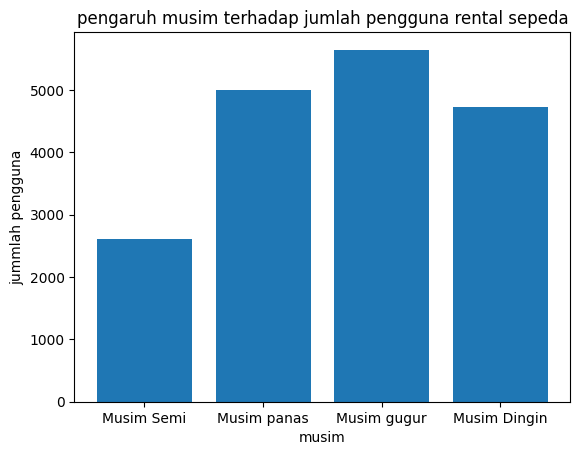

In [24]:
# menggabungkan data season dan cnt
pilih_data = day_df.groupby('season')['cnt'].mean().reset_index()

# mengonversi dataframe menjadi array numpy
data_array = pilih_data.to_numpy()

# memisahkan variabel x (independen) dan y (dependent)
x = data_array[:,0]
y = data_array[:, 1]

plt.title("pengaruh musim terhadap jumlah pengguna rental sepeda")
musim_labels = {1: 'Musim Semi', 2: 'Musim panas', 3: 'Musim gugur', 4: 'Musim Dingin'}
x_labels = [musim_labels[int(val)] for val in x.flatten()]

plt.bar(x,y)
plt.xlabel("musim")
plt.ylabel("jummlah pengguna")
plt.xticks(x.flatten().astype(int),x_labels)
plt.show()

### Pertanyaan 2: Bagaimana kondisi rental sepeda dari tahun 2011 ke tahun 2012


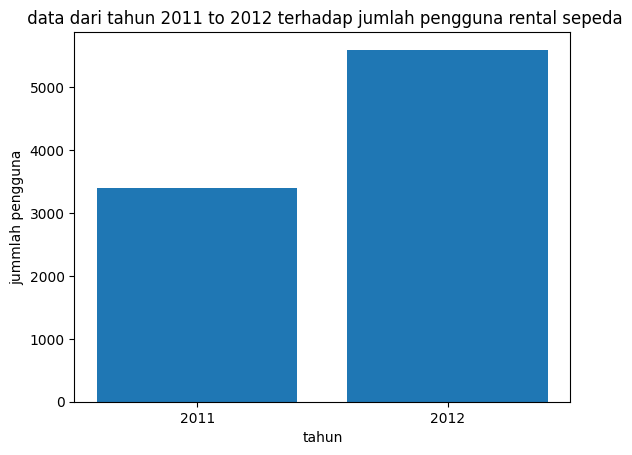

In [25]:
# menggabungkan data yr dan cnt
pilih_data = day_df.groupby('yr')['cnt'].mean().reset_index()

# mengonversi dataframe menjadi array numpy
data_array = pilih_data.to_numpy()

# memisahkan variabel x (independen) dan y (dependent)
x = data_array[:,0]
y = data_array[:, 1]

plt.title(" data dari tahun 2011 to 2012 terhadap jumlah pengguna rental sepeda")
tahun_labels = {0: '2011', 1: '2012'}
x_labels = [tahun_labels[int(val)] for val in x.flatten()]

plt.bar(x,y)
plt.xlabel("tahun")
plt.ylabel("jummlah pengguna")
plt.xticks(x.flatten().astype(int),x_labels)
plt.show()

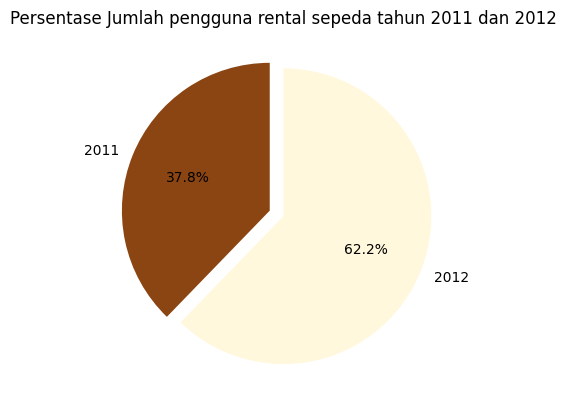

In [26]:

# Mengelompokkan data untuk tahun 2011 dan 2012
yr_0_df = day_df[day_df['yr'] == 0]
yr_1_df = day_df[day_df['yr'] == 1]
isi = [yr_0_df['cnt'].sum(), yr_1_df['cnt'].sum()]

# Plotting pie chart
labelss = ("2011", "2012")
colors = ['#8B4513', '#FFF8DC']
explode = (0.1, 0)

plt.title("Persentase Jumlah pengguna rental sepeda tahun 2011 dan 2012")
plt.pie(
    x=isi,
    labels=labelss,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,  # Untuk mulai pie chart dari sudut 90 derajat (di atas)

)


plt.show()


### Pertanyaan 3 :  Bagaimanakah pengaruh hari liburan , hari dalam seminggu dan hari kerja terhadap jumlah pengguna ?

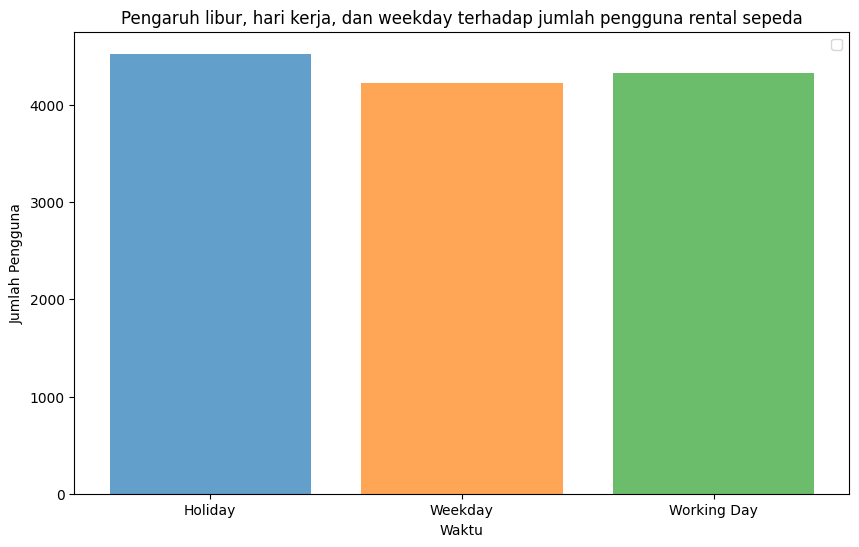

In [27]:
# Menggabungkan data 'holiday', 'weekday', dan 'workingday'
pilih_data_holiday = day_df.groupby('holiday')['cnt'].mean().reset_index()
pilih_data_weekday = day_df.groupby('weekday')['cnt'].mean().reset_index()
pilih_data_workingday = day_df.groupby('workingday')['cnt'].mean().reset_index()

# Mengonversi dataframe menjadi array numpy
data_array_holiday = pilih_data_holiday.to_numpy()
data_array_weekday = pilih_data_weekday.to_numpy()
data_array_workingday = pilih_data_workingday.to_numpy()

# Memisahkan variabel x (independen) dan y (dependent)
x_holiday = 1
y_holiday = data_array_holiday[0, 1]

x_weekday = 2
y_weekday = data_array_weekday[0, 1]

x_workingday = 3
y_workingday = data_array_workingday[0, 1]


# Plotting bar chart

plt.figure(figsize=(10, 6))

plt.bar(x_holiday, y_holiday,  alpha=0.7)
plt.bar(x_weekday, y_weekday,  alpha=0.7)
plt.bar(x_workingday, y_workingday , alpha=0.7)

plt.title("Pengaruh libur, hari kerja, dan weekday terhadap jumlah pengguna rental sepeda")
plt.xlabel("Waktu")
plt.ylabel("Jumlah Pengguna")
plt.xticks([x_holiday, x_weekday, x_workingday], ['Holiday', 'Weekday', 'Working Day'])
plt.legend()
plt.show()

### Pertanyaan 4 : Bagaimanakah pengaruh cuaca terhadap jumlah pengguna

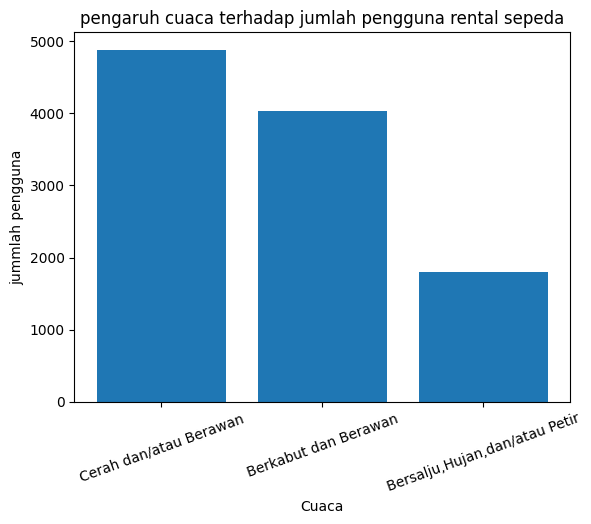

In [28]:
# menggabungkan data weathersit
pilih_data = day_df.groupby('weathersit')['cnt'].mean().reset_index()

# mengonversi dataframe menjadi array numpy
data_array = pilih_data.to_numpy()

# memisahkan variabel x (independen) dan y (dependent)
x = data_array[:,0]
y = data_array[:, 1]

plt.title("pengaruh cuaca terhadap jumlah pengguna rental sepeda")
cuaca_labels = {1: 'Cerah dan/atau Berawan', 2: 'Berkabut dan Berawan', 3: 'Bersalju,Hujan,dan/atau Petir'}
x_labels = [cuaca_labels[int(val)] for val in x.flatten()]

plt.bar(x,y)
plt.xlabel("Cuaca")
plt.ylabel("jummlah pengguna")
plt.xticks(x.flatten().astype(int),x_labels,rotation=20)
plt.show()

### Pertanyaan 5 : Bagaimanakah pengaruh jam terhadap jumlah pengguna

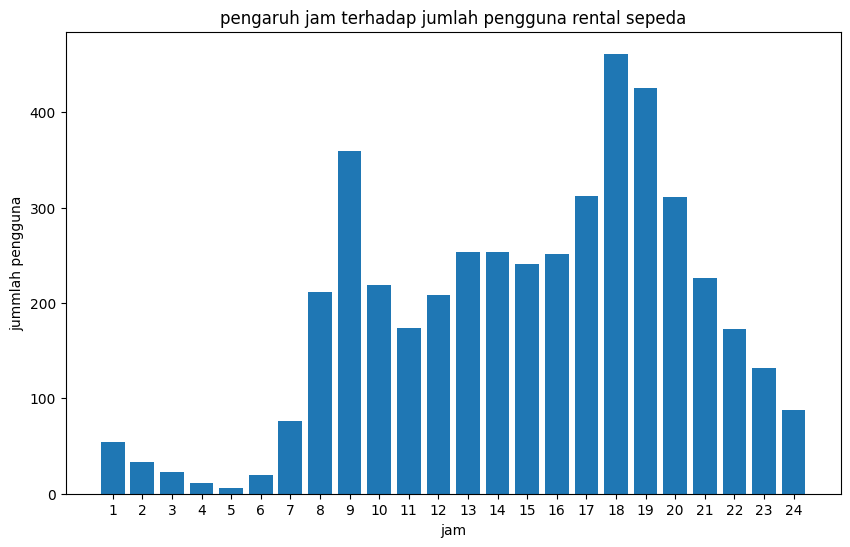

In [29]:
# menggabungkan data sweathersit
pilih_data = hour_df.groupby('hr')['cnt'].mean().reset_index()

# mengonversi dataframe menjadi array numpy
data_array = pilih_data.to_numpy()

# memisahkan variabel x (independen) dan y (dependent)
x = data_array[:,0]
y = data_array[:, 1]

# memisahkan variabel x (independen) dan y (dependent)
plt.figure(figsize=(10,6))
plt.title("pengaruh jam terhadap jumlah pengguna rental sepeda")
tahun_labels = {}
for i in range(24):
    tahun_labels[i] = i + 1
x_labels = [tahun_labels[int(val)] for val in x.flatten()]

plt.bar(x,y)
plt.xlabel("jam")
plt.ylabel("jummlah pengguna")
plt.xticks(x.flatten().astype(int),x_labels)
plt.show()





### Pertanyaan 6 : Bagaimanakah tren dari seluruh data yang terekam terhadap jumlah pengguna rental sepeda

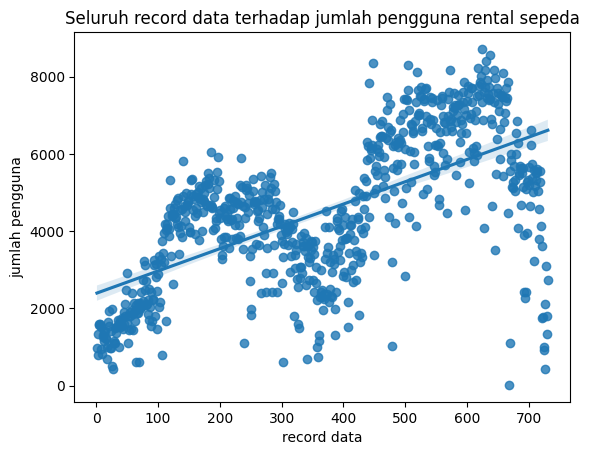

,0,1,2,3,4,5,6,7,8,9,...,721,722,723,724,725,726,727,728,729,730
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
727,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
728,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
729,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0


In [30]:
# membuat garis regresi linear tanpa menggunakan algoritma machine learning
sns.regplot(
    x=day_df['instant'],
    y=day_df['cnt']
)
plt.title("Seluruh record data terhadap jumlah pengguna rental sepeda")
plt.xlabel("record data")
plt.ylabel("jumlah pengguna")
plt.show()

# nilai korelasi dari data record terhadap jumlah pengguna
data_corr = (
   day_df['instant'],
   day_df['cnt']
)
# memberi spasi
print("")

# nilai korelasi data
datacorr_df = pd.DataFrame(data_corr)
datacorr_df.corr(numeric_only=True)


## Conclusion

- Berdasarkan visualisasi data mengenai pengaruh musim terhadap jumlah pengguna rental sepeda , diketahui bahwa musim gugur merupakan musim dengan jumlah pengguna rental sepeda terbanyak , kemungkinan hal ini dikarenakan musim gugur memiliki pemandangan yang indah serta cuaca yang nyaman sehingga banyak yang ingin melakukan aktivitas - aktivitas diluar salah satunya adalah aktivitas sepeda.
- Kondisi rental sepeda dari tahun 2011 hingga 2012 mengalami kenaikan , hal ini menandakan bahwa peminat aktivitas sepeda semakin tinggi serta bisnis rental sepeda mengalamai peningkatan sebesar 64%
- pengaruh hari liburan , hari kerja dan juga hari-hari dalam seminggu terhadap jumlah pengguna tidaklah memiliki selisih yang signifikan , walaupun begitu pada hari liburan memliki pengguna rental sepeda yang terbanyak daripada hari lain
- pengaruh cuaca terhadap jumalh pengguna memilkiki pengaruh yang signifikan dimana banyak pengguna rental sepeda melakukan aktivitas pada cuaca yang cerah dan/atau berawan
- Dapat Diketahui bahwa jumlah pengguna rental sepeda rata-rata terbanyak adalah pada waktu jam 6 sore dan rata-rata paling sedikit adalah jam 12 malam
- Berdasarkan jumlah record data yang ada yaitu merepresentasikan data dari tanggal 2011-01-01 hingga 2012-12-31 terhadap jumlah penggunanya diketahui terdapat kenaikan rata-rata jumlah pengguna rental ini menunjukkan bahwa bisnis berjalan dengan sangat baik dan disertai dnegan nilai korelasi yang positif yaitu 1 menunjukkan bahwa hubungannya bersifat saling bersesuaian.